<a href="https://colab.research.google.com/github/carlosfmorenog/CM4125/blob/main/CM4125_T8/CM4125_Lec8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM4125 Topic 8: Time Series Data + Bar Chart Race

## Lecture objectives

1) Understand the concept of time series data and what does it imply

2) Process time series datasets into effective dataframes

3) Produce a bar chart race

## What is Time Series Data (TSD)?

Simply put, datasets that describe/contain data which varies over time

They are usually characterised by a fixed and constant aggregation of data

    Readings from sensors
    COVID cases
    Trends in economics

The art of using these datasets resides in knowing how to shape them and using the right features

To practice, we will use the dataset called `bitcoin.csv`

This dataset contains the price of the Bitcoin cryptocurrency on the US-based exchange Gemini, minute-by-minute for all of 2017

In [ ]:
import pandas as pd
import numpy as np
bitcoin = pd.read_csv(
    'https://www.dropbox.com/scl/fi/42vpk6iccnge6jmonjv48/bitcoin.csv?rlkey=vicct09dqdg0ae4wqxg9ri46l&raw=1',
                      index_col=0)
bitcoin

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-01 00:00:00,974.55,974.55,974.55,974.55,0.000000
2017-01-01 00:01:00,974.55,974.55,974.55,974.55,0.000000
2017-01-01 00:02:00,974.55,974.55,970.00,970.00,0.417679
2017-01-01 00:03:00,970.00,970.00,970.00,970.00,0.000514
2017-01-01 00:04:00,970.00,970.00,970.00,970.00,0.000000
...,...,...,...,...,...
2017-12-31 23:55:00,13782.87,13782.87,13771.00,13771.00,1.657980
2017-12-31 23:56:00,13771.00,13775.00,13770.95,13775.00,7.538428
2017-12-31 23:57:00,13775.00,13815.37,13775.00,13815.37,18.437304


Note that the `Date` column contains entries formatted as a date-time such as `2017-01-01 00:00:00`

First, let's check the type of this data by examining the first item

In [ ]:
first_index_value = bitcoin.index[0]
print(first_index_value)
print(type(first_index_value))

2017-01-01 00:00:00
<class 'str'>


We can avoid this in one go by parsing the dates when loading

In [ ]:
bitcoin = pd.read_csv(
    'https://www.dropbox.com/scl/fi/42vpk6iccnge6jmonjv48/bitcoin.csv?rlkey=vicct09dqdg0ae4wqxg9ri46l&raw=1',
                      parse_dates=['Date'], index_col=0)
bitcoin

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-01 00:00:00,974.55,974.55,974.55,974.55,0.000000
2017-01-01 00:01:00,974.55,974.55,974.55,974.55,0.000000
2017-01-01 00:02:00,974.55,974.55,970.00,970.00,0.417679
2017-01-01 00:03:00,970.00,970.00,970.00,970.00,0.000514
2017-01-01 00:04:00,970.00,970.00,970.00,970.00,0.000000
...,...,...,...,...,...
2017-12-31 23:55:00,13782.87,13782.87,13771.00,13771.00,1.657980
2017-12-31 23:56:00,13771.00,13775.00,13770.95,13775.00,7.538428
2017-12-31 23:57:00,13775.00,13815.37,13775.00,13815.37,18.437304


If we check the column now, it is marked as `Timestamp`

In [ ]:
first_index_value = bitcoin.index[0]
print(first_index_value)
print(type(first_index_value))

2017-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Exploring TSD

This dataset contains the following columns:

Price Data:

- Open - The price of the commodity *(bitcoin)* at the **start** of the time period *(minute)*
- High - The **highest** value the price reached during the time period
- Low - The **lowest** value the price reached during the time period
- Close - The price at the **end** of the time period

Trade Data:

- Volume - The total amount of the commodity bought/sold in the time period

Other time series datasets with have other columns, but this is common for financial data

Even though the index is stored as `Timestamp`, we can retrieve rows by querying with a string

For example during the minute `2017-05-27 19:30:00`, we can query using `2017-05-27 19:30:00` which matches the data

However, since the dataset has only minute-by-minute data, the seconds don't matter, so we can exclude the seconds in our query and search for `2017-05-27 19:30`

In [ ]:
bitcoin.loc['2017-05-27 19:30']

,2017-05-27 19:30:00
Open,2144.68000
High,2144.68000
Low,2141.26000
Close,2142.53000
Volume,0.05406


The price started this minute at `2144.68` USD, dropped to `2142.53` USD at the end of the minute

During this time the minimum value was `2141.26` USD and the maximum value was `2144.68` USD

`0.05406` bitcoin was bought/sold during this minute

Let's check the next minute `2017-05-27 19:31`

In [ ]:
bitcoin.loc['2017-05-27 19:31']

,2017-05-27 19:31:00
Open,2142.5300
High,2142.5300
Low,2141.2700
Close,2141.2700
Volume,0.2069


The previous minute **closed** at `2142.53` USD and this minute **opened** at `2142.53` USD

This is expected since the end of one minute is the same as the start of the next minute!

If we want to check the open and close price for the **day**, we could check the open price for the first minute and close price for the last minute

In [ ]:
print("Date: 2017-05-27")
print("Open: ", bitcoin.loc['2017-05-27 00:00'].at["Open"])
print("Close: ", bitcoin.loc['2017-05-27 23:59'].at["Close"])

Date: 2017-05-27
Open:  2267.37
Close:  2096.77


We can select an interval of time the same way we do with numbers

In Tableau, you can "open" a variable and filter by date, or you can create plots where each year is in a different page

With the following code, we select all of the values in May of 2017

In [ ]:
bitcoin[(bitcoin.index >= '2017-05') & (bitcoin.index < '2017-06')]

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-01 00:00:00,1362.63,1362.63,1359.05,1359.05,0.129530
2017-05-01 00:01:00,1359.05,1359.05,1359.05,1359.05,0.015945
2017-05-01 00:02:00,1359.05,1359.05,1359.05,1359.05,0.430274
2017-05-01 00:03:00,1359.05,1359.05,1359.05,1359.05,0.024931
2017-05-01 00:04:00,1359.05,1359.05,1359.05,1359.05,0.000000
...,...,...,...,...,...
2017-05-31 23:55:00,2301.80,2301.80,2301.80,2301.80,0.000000
2017-05-31 23:56:00,2301.80,2301.80,2301.80,2301.80,0.065392
2017-05-31 23:57:00,2301.80,2301.80,2301.80,2301.80,0.000000


Selecting all of the values for 1st May before noon

In [ ]:
bitcoin[(bitcoin.index >= '2017-05-01') & (bitcoin.index < '2017-05-01 12:00')]

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-01 00:00:00,1362.63,1362.63,1359.05,1359.05,0.129530
2017-05-01 00:01:00,1359.05,1359.05,1359.05,1359.05,0.015945
2017-05-01 00:02:00,1359.05,1359.05,1359.05,1359.05,0.430274
2017-05-01 00:03:00,1359.05,1359.05,1359.05,1359.05,0.024931
2017-05-01 00:04:00,1359.05,1359.05,1359.05,1359.05,0.000000
...,...,...,...,...,...
2017-05-01 11:55:00,1376.43,1376.43,1376.40,1376.43,0.064194
2017-05-01 11:56:00,1376.43,1377.36,1376.43,1377.36,0.013068
2017-05-01 11:57:00,1377.36,1377.36,1377.35,1377.35,0.023829


## Calculations with TSD

We may want to calculate other values such as taking the middle value between the `Low` and `High` values, this will allow us to calculate an estimate for the value of the bitcoin traded

It will only be an **estimate**, since we don't have the exact list of trades available in this dataset!

We can perform calculations on the columns in exactly the same we we have with any other dataset before

In [ ]:
bitcoin['Middle'] = (bitcoin['High'] + bitcoin['Low']) / 2
bitcoin['USD Volume'] = bitcoin['Middle'] * bitcoin['Volume']
bitcoin

,Open,High,Low,Close,Volume,Middle,USD Volume
Date,,,,,,,
2017-01-01 00:00:00,974.55,974.55,974.55,974.55,0.000000,974.550,0.000000
2017-01-01 00:01:00,974.55,974.55,974.55,974.55,0.000000,974.550,0.000000
2017-01-01 00:02:00,974.55,974.55,970.00,970.00,0.417679,972.275,406.099132
2017-01-01 00:03:00,970.00,970.00,970.00,970.00,0.000514,970.000,0.498755
2017-01-01 00:04:00,970.00,970.00,970.00,970.00,0.000000,970.000,0.000000
...,...,...,...,...,...,...,...
2017-12-31 23:55:00,13782.87,13782.87,13771.00,13771.00,1.657980,13776.935,22841.878972
2017-12-31 23:56:00,13771.00,13775.00,13770.95,13775.00,7.538428,13772.975,103826.583413
2017-12-31 23:57:00,13775.00,13815.37,13775.00,13815.37,18.437304,13795.185,254346.017926


## Resampling TSD

Sometimes we are interested in sampling the data in larger chunks than it is presented

For instance, this data has one line per **minute**; we may want data for **days** instead

The method to resample the data in Python is called `resample`, and takes a time period as an argument

For example, `1D` means 1 day (you can see more options [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html))

In [ ]:
# Not very useful output, right?
bitcoin.resample('1D')

If we call the `mean` method, it will average out the values of this new object by day

In [ ]:
bitcoin.resample('1D').mean()

,Open,High,Low,Close,Volume,Middle,USD Volume
Date,,,,,,,
2017-01-01,980.776378,980.898135,980.663396,980.793059,0.743065,980.780766,737.218302
2017-01-02,1016.424132,1016.618785,1016.247319,1016.439174,1.006385,1016.433052,1025.061363
2017-01-03,1023.624340,1023.743431,1023.514653,1023.634618,1.596420,1023.629042,1636.278683
2017-01-04,1082.933979,1083.422104,1082.550431,1083.009069,2.258822,1082.986267,2464.408073
2017-01-05,1056.542243,1057.577083,1055.411271,1056.446187,4.190673,1056.494177,4165.407749
...,...,...,...,...,...,...,...
2017-12-27,15639.538896,15655.889035,15621.917583,15639.252847,6.427652,15638.903309,99412.047834
2017-12-28,14261.058215,14285.193507,14237.371021,14260.412146,7.639668,14261.282264,108742.624129
2017-12-29,14535.871354,14549.550931,14522.446875,14535.931340,4.438627,14535.998903,64443.408129


The method takes the values in the column `Volume` and rows `2017-01-01 00:00` to `2017-01-01 23:59` and averages them

We can also get the total by adding the values

In [ ]:
# The number of rows (365) hint that it was correct
bitcoin.resample('1D').sum()

,Open,High,Low,Close,Volume,Middle,USD Volume
Date,,,,,,,
2017-01-01,1.412318e+06,1.412493e+06,1412155.29,1.412342e+06,1070.013119,1.412324e+06,1.061594e+06
2017-01-02,1.463651e+06,1.463931e+06,1463396.14,1.463672e+06,1449.193752,1.463664e+06,1.476088e+06
2017-01-03,1.474019e+06,1.474191e+06,1473861.10,1.474034e+06,2298.844903,1.474026e+06,2.356241e+06
2017-01-04,1.559425e+06,1.560128e+06,1558872.62,1.559533e+06,3252.704150,1.559500e+06,3.548748e+06
2017-01-05,1.521421e+06,1.522911e+06,1519792.23,1.521283e+06,6034.569411,1.521352e+06,5.998187e+06
...,...,...,...,...,...,...,...
2017-12-27,2.252094e+07,2.254448e+07,22495561.32,2.252052e+07,9255.819566,2.252002e+07,1.431533e+08
2017-12-28,2.053592e+07,2.057068e+07,20501814.27,2.053499e+07,11001.121472,2.053625e+07,1.565894e+08
2017-12-29,2.093165e+07,2.095135e+07,20912323.50,2.093174e+07,6391.623337,2.093184e+07,9.279851e+07


This operation was more useful for the `Volume` column, as it now sums up all of the entries for that day

We can see that `1070.013119` bitcoin (about $1,061,594 at the time) were traded on 01/01

In fact there was another way to get this!
    
    Multiply bitcoin per minute rate from before (0.743065) times the number of minute in a day (1440)

In [ ]:
1440*0.743065

1070.0136

## Resampling TSD by Column

If we want the lowest or highest price for the whole day, we don't need an average or a sum!

We can tell Pandas to use `max` on these values, and also we can use `min` for `Low`

In [ ]:
bitcoin.resample('1D').max()

,Open,High,Low,Close,Volume,Middle,USD Volume
Date,,,,,,,
2017-01-01,1003.54,1003.54,1003.54,1003.54,110.126689,1003.540,1.102911e+05
2017-01-02,1035.89,1035.90,1035.88,1035.89,116.627861,1035.885,1.197103e+05
2017-01-03,1038.26,1038.26,1038.26,1038.26,405.000039,1038.260,4.150481e+05
2017-01-04,1150.00,1155.54,1149.97,1150.00,167.000000,1149.980,1.839179e+05
2017-01-05,1167.16,1167.16,1167.16,1167.16,918.000000,1167.160,8.822990e+05
...,...,...,...,...,...,...,...
2017-12-27,16500.00,16500.00,16499.58,16500.00,115.322939,16499.790,1.704437e+06
2017-12-28,15495.96,15499.99,15493.84,15495.96,143.885194,15494.420,2.005490e+06
2017-12-29,15077.92,15115.10,15060.75,15077.92,172.666517,15087.925,2.448388e+06


In [ ]:
bitcoin.resample('1D').min()

,Open,High,Low,Close,Volume,Middle,USD Volume
Date,,,,,,,
2017-01-01,965.00,965.00,965.00,965.00,0.0,965.000,0.0
2017-01-02,995.00,995.01,995.00,995.00,0.0,995.010,0.0
2017-01-03,1014.34,1014.35,1014.06,1014.34,0.0,1014.345,0.0
2017-01-04,1035.03,1035.03,1035.02,1035.03,0.0,1035.030,0.0
2017-01-05,879.00,899.87,879.00,879.00,0.0,892.365,0.0
...,...,...,...,...,...,...,...
2017-12-27,14541.60,14599.62,14521.00,14541.60,0.0,14560.500,0.0
2017-12-28,13532.44,13579.80,13514.81,13532.44,0.0,13556.120,0.0
2017-12-29,13962.47,14000.02,13949.50,13962.47,0.0,13983.010,0.0


To generate a new dataframe with both changes applied to the respective column in one line of code, we will use the `resample`, `lambda` and `apply` methods:

- For `High`, we will `max` the values of `High` for each minute

- For `Low`, we will use `min`

- For `Volume` and `USD Volume`, we will use `sum`

- For `Open`, we will use the **first** item (index `[0]`)

- For `Close`, we will use the **last** item (index `[-1]`)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
daily = bitcoin.resample('1D').apply({'Open'       : lambda x: x[0],
                                      'High'       : np.max,
                                      'Low'        : np.min,
                                      'Close'      : lambda x: x[-1],
                                      'Volume'     : np.sum,
                                      'USD Volume' : np.sum})
daily

,Open,High,Low,Close,Volume,USD Volume
Date,,,,,,
2017-01-01,974.55,1003.54,965.00,998.57,1070.013119,1.061594e+06
2017-01-02,998.57,1035.90,995.00,1020.23,1449.193752,1.476088e+06
2017-01-03,1020.23,1038.26,1014.06,1035.03,2298.844903,2.356241e+06
2017-01-04,1035.03,1155.54,1035.02,1143.16,3252.704150,3.548748e+06
2017-01-05,1143.16,1167.16,879.00,1004.84,6034.569411,5.998187e+06
...,...,...,...,...,...,...
2017-12-27,15830.86,16500.00,14521.00,15418.95,9255.819566,1.431533e+08
2017-12-28,15418.95,15499.99,13514.81,14488.61,11001.121472,1.565894e+08
2017-12-29,14488.61,15115.10,13949.50,14574.99,6391.623337,9.279851e+07


Notice that the `Close` of one day still matches the `Open` of the next

Moreover, we have deliberately left out `Middle` since we want to recalculate it on a daily basis, as it will be different from what we calculate on a minute basis!

We will leave the `USD Volume` based on minute data since that will give a more accurate estimate and this column is not exact since we don't have the trades list

Let's recalculate `Middle` on this new daily data

In [ ]:
daily['Middle'] = (daily['High'] + daily['Low']) / 2
daily

,Open,High,Low,Close,Volume,USD Volume,Middle
Date,,,,,,,
2017-01-01,974.55,1003.54,965.00,998.57,1070.013119,1.061594e+06,984.270
2017-01-02,998.57,1035.90,995.00,1020.23,1449.193752,1.476088e+06,1015.450
2017-01-03,1020.23,1038.26,1014.06,1035.03,2298.844903,2.356241e+06,1026.160
2017-01-04,1035.03,1155.54,1035.02,1143.16,3252.704150,3.548748e+06,1095.280
2017-01-05,1143.16,1167.16,879.00,1004.84,6034.569411,5.998187e+06,1023.080
...,...,...,...,...,...,...,...
2017-12-27,15830.86,16500.00,14521.00,15418.95,9255.819566,1.431533e+08,15510.500
2017-12-28,15418.95,15499.99,13514.81,14488.61,11001.121472,1.565894e+08,14507.400
2017-12-29,14488.61,15115.10,13949.50,14574.99,6391.623337,9.279851e+07,14532.300


## Plotting TSD

Typically, the first plot used for this type of data is a line plot

In [ ]:
import plotly.express as px
fig = px.line(daily.reset_index(), x='Date', y='Middle')
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

daily.reset_index(inplace=True)

fig = go.Figure(data=[go.Candlestick(x=daily['Date'],
                open=daily['Open'],
                high=daily['High'],
                low=daily['Low'],
                close=daily['Close'])])

fig.show()

## Loading a TSD in Tablaeu

How does it look in [Tableau](https://public.tableau.com/views/candle_17295910866370/Line?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link)? How to do it [Option 1](https://community.tableau.com/s/news/a0A4T000001v7OUUAY/candlestick-charts-in-tableau) and [Option 2](https://tarsolutions.co.uk/blog/tableau-candlestick-chart/)

## Bart Chart Race

However, if we had the data of one more cryptocurrency (yes, there's [more crypto other than bitcoin!](https://coinmarketcap.com/all/views/all/)), we could compare their trends and see which one is trading higher!

And that is why people came up with... the BAR CHART RACE (BCR)!

![Fig 1.](https://www.dropbox.com/scl/fi/rfvnty2gwjp85y4xvjzd0/barchartrace.gif?rlkey=kysnmcw1re71pmj6jfmod3yrr&raw=1)

Although recently, I've seen more LINE races! Like [this one](https://twitter.com/ChumelTorres/status/1709365253216039328?t=2lN7NFWs4Bp295uuJ46ESA&s=08)

Let's see how this example was produced using Python

We will use a file called `city_populations.txt` which you can download from [here](https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations)

This file contains population data of different world cities through time

In [ ]:
df = pd.read_csv(
    'https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations')
df

,name,group,year,value,subGroup,city_id,lastValue,lat,lon
0,Agra,India,1575,200.0,India,Agra - India,200.0,27.18333,78.01667
1,Agra,India,1576,212.0,India,Agra - India,200.0,27.18333,78.01667
2,Agra,India,1577,224.0,India,Agra - India,212.0,27.18333,78.01667
3,Agra,India,1578,236.0,India,Agra - India,224.0,27.18333,78.01667
4,Agra,India,1579,248.0,India,Agra - India,236.0,27.18333,78.01667
...,...,...,...,...,...,...,...,...,...
6247,Vijayanagar,India,1561,480.0,India,Vijayanagar - India,480.0,15.33500,76.46200
6248,Vijayanagar,India,1562,480.0,India,Vijayanagar - India,480.0,15.33500,76.46200
6249,Vijayanagar,India,1563,480.0,India,Vijayanagar - India,480.0,15.33500,76.46200
6250,Vijayanagar,India,1564,480.0,India,Vijayanagar - India,480.0,15.33500,76.46200


Let's clean this a little bit...

In [ ]:
# These are the only columns we need
df = df[['name','group','year','value']]
df

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0
3,Agra,India,1578,236.0
4,Agra,India,1579,248.0
...,...,...,...,...
6247,Vijayanagar,India,1561,480.0
6248,Vijayanagar,India,1562,480.0
6249,Vijayanagar,India,1563,480.0
6250,Vijayanagar,India,1564,480.0


We will change the names of the columns to something more coherent!

In [ ]:
df = df.rename(columns={"name": "City",
                        "group": "Continent",
                        "year": "Year",
                        "value":"Population"})
df

,City,Continent,Year,Population
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0
3,Agra,India,1578,236.0
4,Agra,India,1579,248.0
...,...,...,...,...
6247,Vijayanagar,India,1561,480.0
6248,Vijayanagar,India,1562,480.0
6249,Vijayanagar,India,1563,480.0
6250,Vijayanagar,India,1564,480.0


Notice that in the `Continent` column we have India for some cities

If I'm correct, India is a sub-continent rather than a continent!

Let's see the continents listed here...

In [ ]:
set(df['Continent'])

{'Asia', 'Europe', 'India', 'Latin America', 'Middle East', 'North America'}

Middle East and Latin America are also listed as continents!

In [ ]:
# Cities in the "Indian continent"
print(set(df[df['Continent']=='India']['City']))

{'Cuttack', 'Kolkatta', 'Agra', 'Delhi', 'Gauda', 'Mumbai', 'Ahmedabad', 'Vijayanagar', 'Bijapur', 'Lucknow'}


In [ ]:
# Cities with "Middle East" continent
print(set(df[df['Continent']=='Middle East']['City']))

{'Esfahan', 'Fez', 'Tabriz', 'Cairo', 'Mashhad'}


In [ ]:
# Cities with "Latin America" continent
print(set(df[df['Continent']=='Latin America']['City']))

{'Mexico City', 'Buenos Aires', 'Sao Paulo', 'Rio de Janeiro'}


Let's first replace `India -> Asia`

In [ ]:
df['Continent'] = df['Continent'].replace('India', 'Asia')

With the other two is slightly different, as these categories contain cities from different continents!

In fact, I may need to change "one by one"

In [ ]:
import warnings;
warnings.simplefilter('ignore')
df['Continent'][df['City']=='Fez']='Africa'
df['Continent'][df['City']=='Cairo']='Africa'
df['Continent'] = df['Continent'].replace('Middle East', 'Asia')
df['Continent'][df['City']=='Mexico City']='North America'
df['Continent'] = df['Continent'].replace('Latin America', 'South America')

In [ ]:
# Show that the replacement has been successful
df[df['City']=='Cairo']

,City,Continent,Year,Population
1055,Cairo,Africa,1500,400.0
1056,Cairo,Africa,1501,399.2
1057,Cairo,Africa,1502,398.4
1058,Cairo,Africa,1503,397.6
1059,Cairo,Africa,1504,396.8
...,...,...,...,...
1193,Cairo,Africa,2016,19131.2
1194,Cairo,Africa,2017,19490.4
1195,Cairo,Africa,2018,19849.6
1196,Cairo,Africa,2019,20208.8


I will save the new dataset locally

In [ ]:
df.to_csv(r'city_populations_updated.csv',index=False)

Now, let's try to do our own BCR with `Python` and the `matplotlib` package

In [ ]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

If we just plot **city vs population** using `ax.barh`, we will see the last value of population for each of the cities

<BarContainer object of 6252 artists>

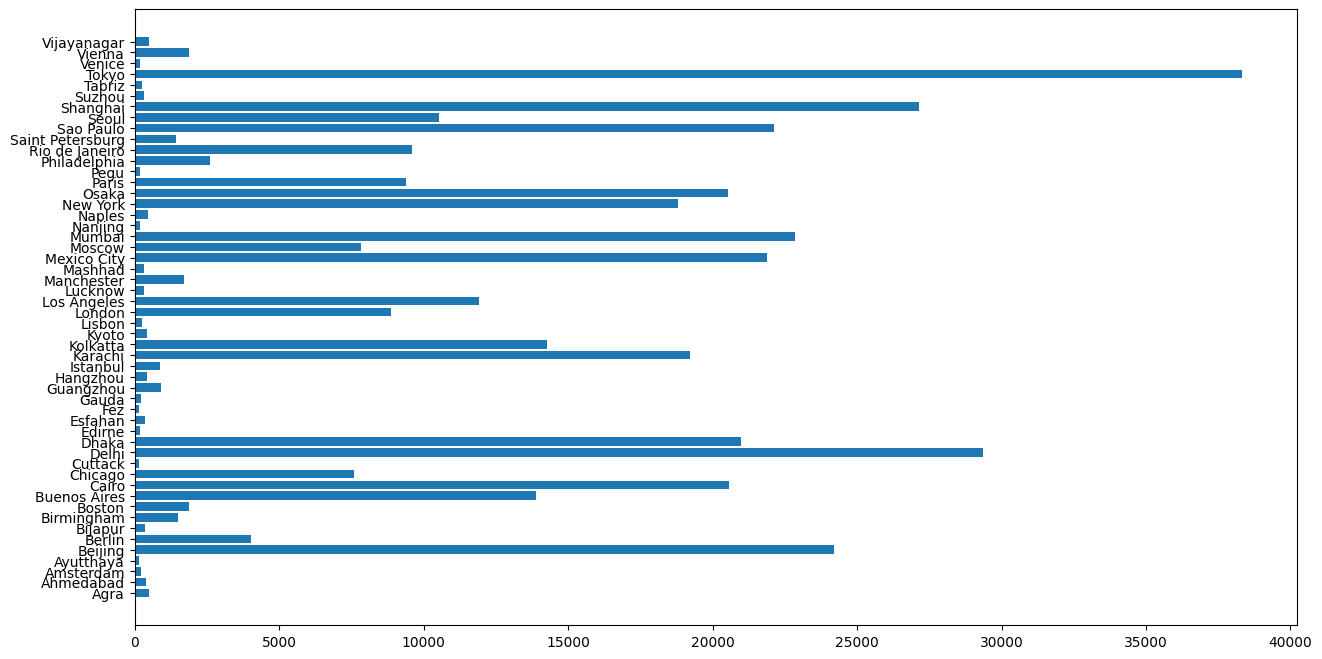

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df['City'], df['Population'])

To do a BCR, we need to define a given year and sort the cities from most to least populated (for that year)

In [ ]:
current_year = 1500
df2 = (df[df['Year'].eq(current_year)]
       .sort_values(by='Population',ascending=False))
df2

,City,Continent,Year,Population
276,Beijing,Asia,1500,672.0
6186,Vijayanagar,Asia,1500,500.0
1055,Cairo,Africa,1500,400.0
1791,Hangzhou,Asia,1500,250.0
5595,Tabriz,Asia,1500,250.0
1503,Gauda,Asia,1500,200.0
2142,Istanbul,Europe,1500,200.0
4682,Paris,Europe,1500,185.0
1537,Guangzhou,Asia,1500,150.0
3751,Nanjing,Asia,1500,147.0


Notice that in this dataset, we don't have all cities for each year so we would get different charts

<BarContainer object of 12 artists>

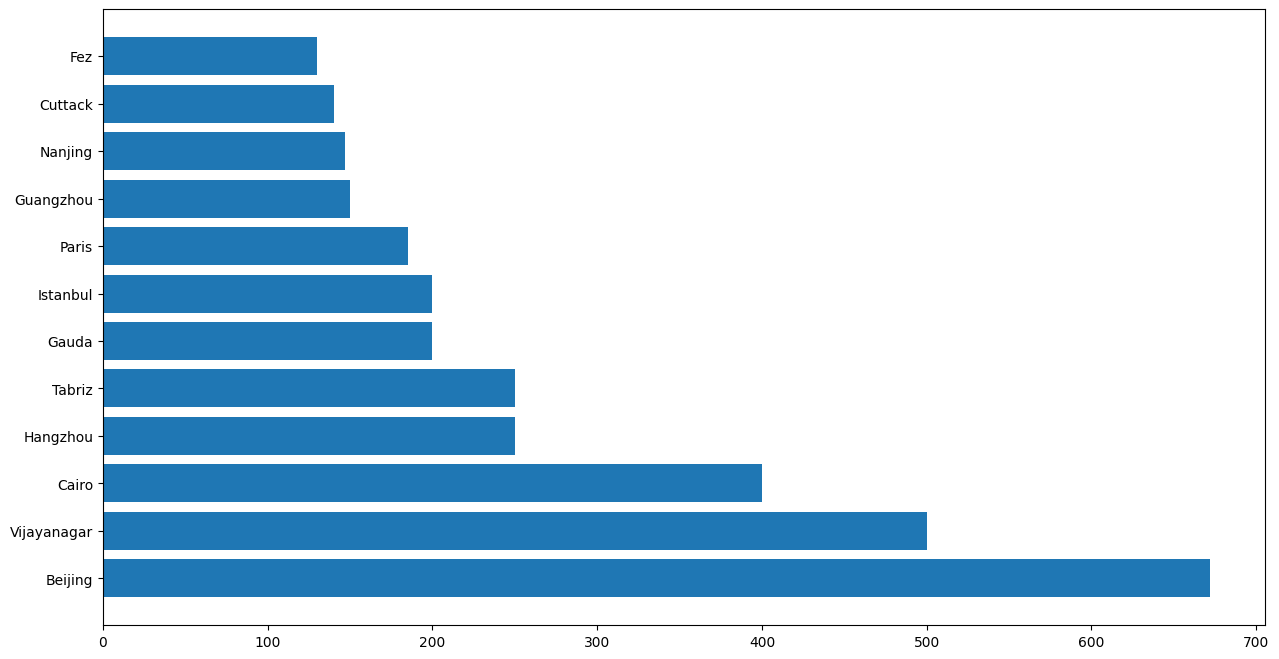

In [ ]:
# Plotting a basic bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df2['City'], df2['Population'])

To add colours and labels (for each continent), we will use a dictionary that pairs cities with their respective continent

In [ ]:
colours = dict(zip(
    ['Europe', 'Asia', 'South America', 'North America', 'Africa'],
    ['#adb0ff', '#90d595','#aafbff', '#f7bb5f', '#eafb50']))
group_lk = df.set_index('City')['Continent'].to_dict()
group_lk

{'Agra': 'Asia',
 'Ahmedabad': 'Asia',
 'Amsterdam': 'Europe',
 'Ayutthaya': 'Asia',
 'Beijing': 'Asia',
 'Berlin': 'Europe',
 'Bijapur': 'Asia',
 'Birmingham': 'Europe',
 'Boston': 'North America',
 'Buenos Aires': 'South America',
 'Cairo': 'Africa',
 'Chicago': 'North America',
 'Cuttack': 'Asia',
 'Delhi': 'Asia',
 'Dhaka': 'Asia',
 'Edirne': 'Europe',
 'Esfahan': 'Asia',
 'Fez': 'Africa',
 'Gauda': 'Asia',
 'Guangzhou': 'Asia',
 'Hangzhou': 'Asia',
 'Istanbul': 'Europe',
 'Karachi': 'Asia',
 'Kolkatta': 'Asia',
 'Kyoto': 'Asia',
 'Lisbon': 'Europe',
 'London': 'Europe',
 'Los Angeles': 'North America',
 'Lucknow': 'Asia',
 'Manchester': 'Europe',
 'Mashhad': 'Asia',
 'Mexico City': 'North America',
 'Moscow': 'Europe',
 'Mumbai': 'Asia',
 'Nanjing': 'Asia',
 'Naples': 'Europe',
 'New York': 'North America',
 'Osaka': 'Asia',
 'Paris': 'Europe',
 'Pegu': 'Asia',
 'Philadelphia': 'North America',
 'Rio de Janeiro': 'South America',
 'Saint Petersburg': 'Europe',
 'Sao Paulo': 'South

Now we can use this pairing to get some colours in `df2`

Text(1, 0.4, '1500')

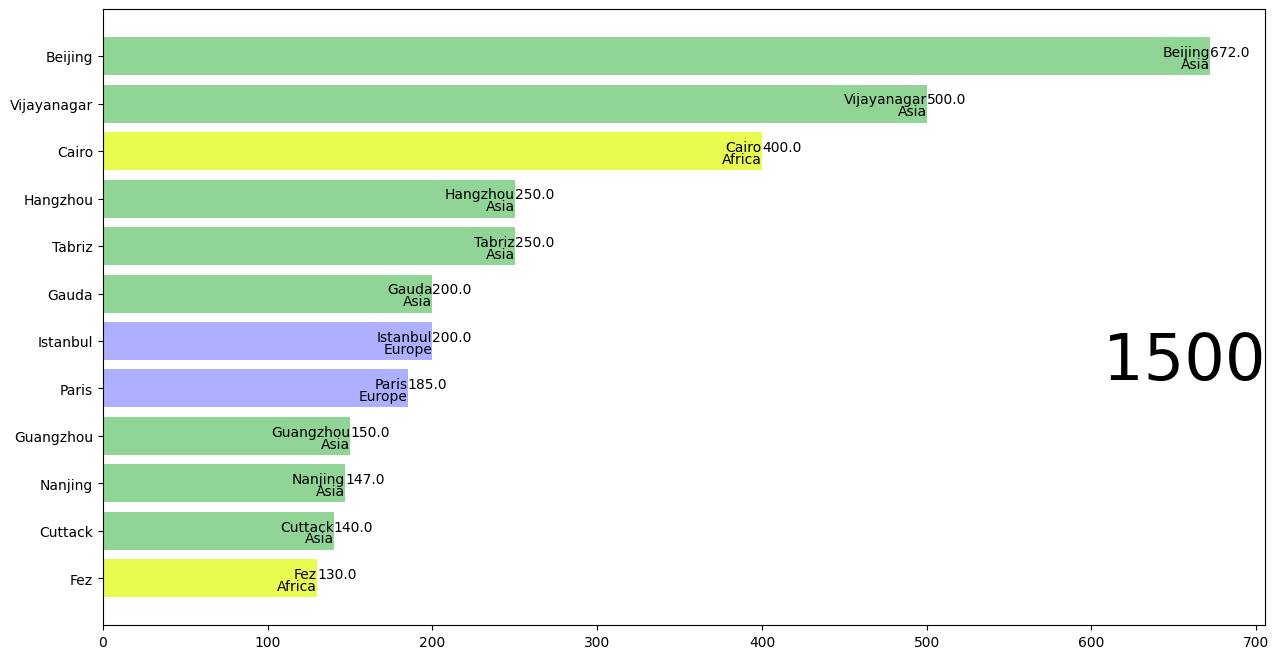

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
df2 = df2[::-1]   # flip values from top to bottom
# pass colours values to `color=`
ax.barh(df2['City'], df2['Population'], color=[colours[group_lk[x]] for x in df2['City']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(df2['Population'], df2['City'])):
    ax.text(value, i,     name,            ha='right')
    ax.text(value, i-.25, group_lk[name],  ha='right')
    ax.text(value, i,     value,           ha='left')
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

This function will draw a more "stylish" function to create the last chart

In [ ]:
# Frankly, I don't know what half of it does...
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Population', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['City'], dff['Population'], color=[colours[group_lk[x]] for x in dff['City']])
    dx = dff['Population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Population'], dff['City'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world ',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

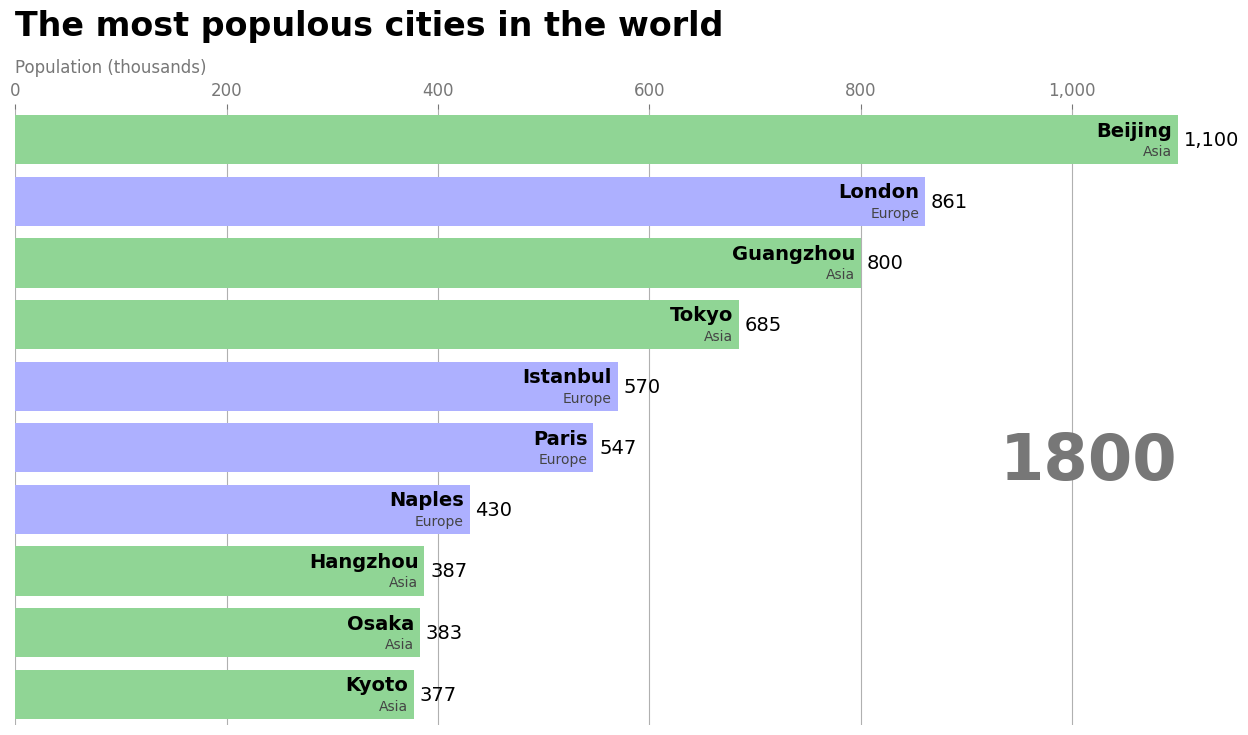

In [ ]:
# Now we execute the function
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(1800)

The most important part is to animate the plot for a range of years

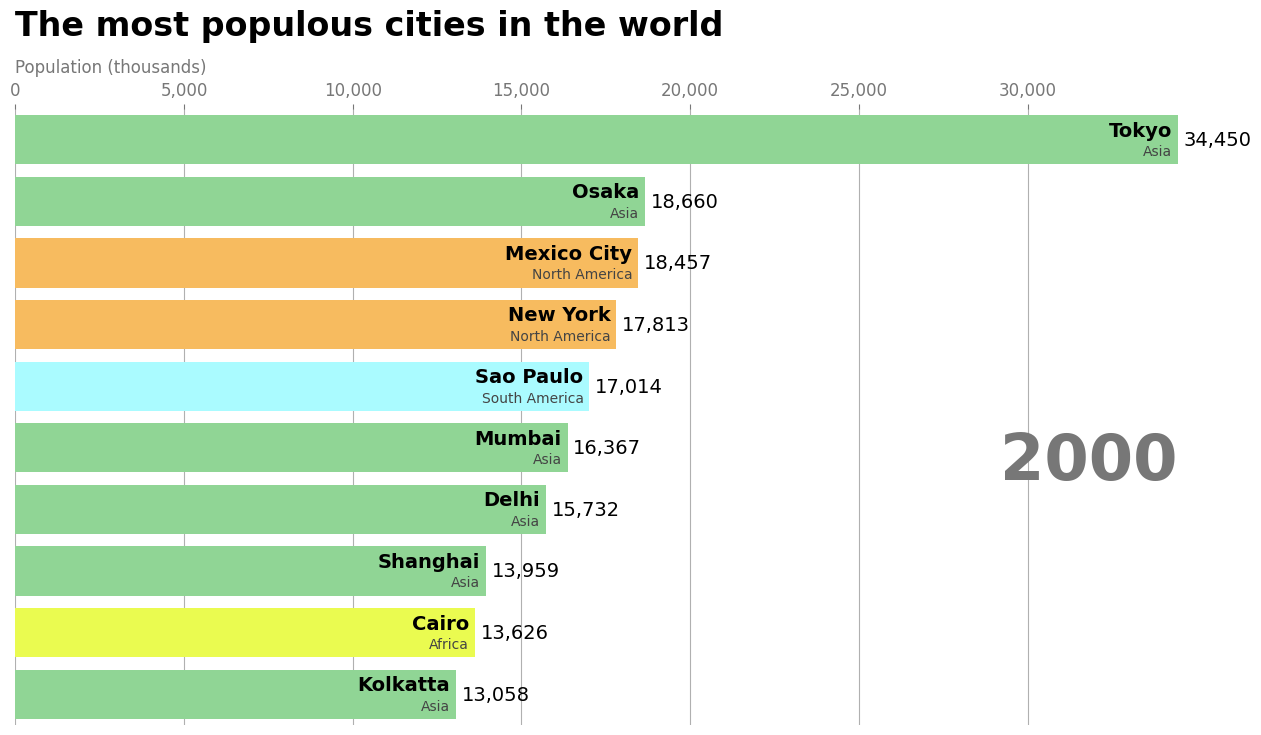

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2000,2020))
HTML(animator.to_jshtml())

## Lab

There are two parts, one for TSD and another for BCR

The first one consists on following the instructions to treat TSD data

The second one has the code seen in class to do the BCR

For that one, I want you to get creative!
   - Can you change colours, styles, names, etc.?
   - Can you skip some years?
   - Can you get rid of the static plot that gets printed after the animation?
   - Can you show not only the top 12 cities?
   - Can you show all cities at the same time?
   - Can you put the years of the range in the title of the chart?
   - Can you run it from 1500 to 2020?
   - Can you make the chart go back in time?

Alternatively you can download the dataset from Moodle and see if other tools are able to these things!
* You can try to install [this Python Module](https://pypi.org/project/bar-chart-race/) which in fact looks easier and better than my proposed method!
    * Although it doesn't allow you to include the continent to colour the bars!
* Using [an app by Microsoft](https://appsource.microsoft.com/en-us/product/power-bi-visuals/WA200000053?tab=Overview)
* Using online services such as [Fluorish](https://app.flourish.studio/@flourish/bar-chart-race) or [Highcharts](https://www.highcharts.com/blog/tutorials/bar-chart-race/)
* Or with [Excel](https://help.xlstat.com/s/article/bar-chart-race-tutorial-in-excel?language=en_US)!